<a href="https://colab.research.google.com/github/VittorLeandro/ANALISE-DE-DADOS---ACIDENTES-PRF2024/blob/main/_ETL_vs_ELT_VITOR_LEANDRO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experimento: ETL vs ELT

**Aluno:** Vitor Leandro  
**RA:** 2024121119  
**Disciplina:** Ciência de Dados

## Introdução

Este experimento tem como objetivo compreender e comparar os conceitos de **ETL** (Extract, Transform, Load) e **ELT** (Extract, Load, Transform). Serão simuladas pipelines simples de dados usando Python e Pandas, calculando o valor total de pedidos por cliente e comparando os resultados das duas abordagens.

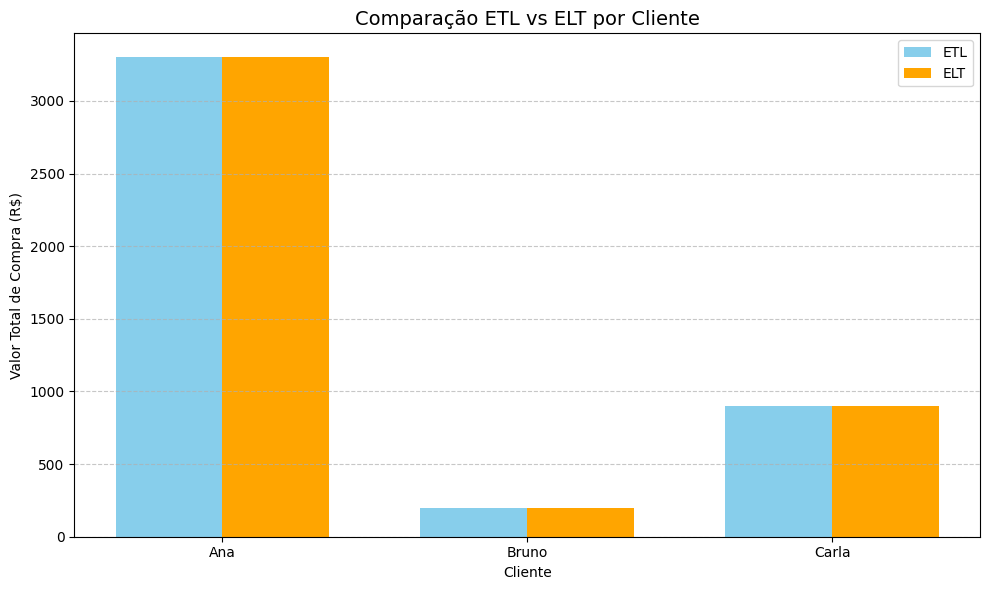

## Tabela de Resultados

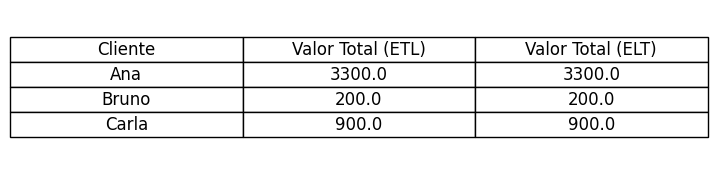

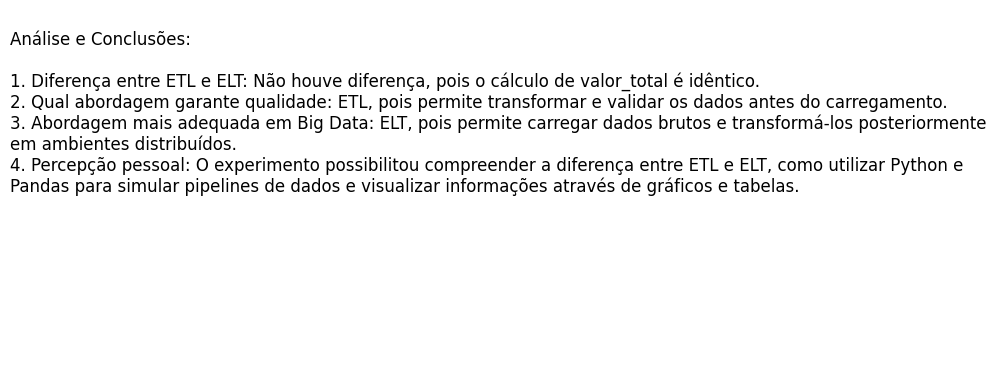

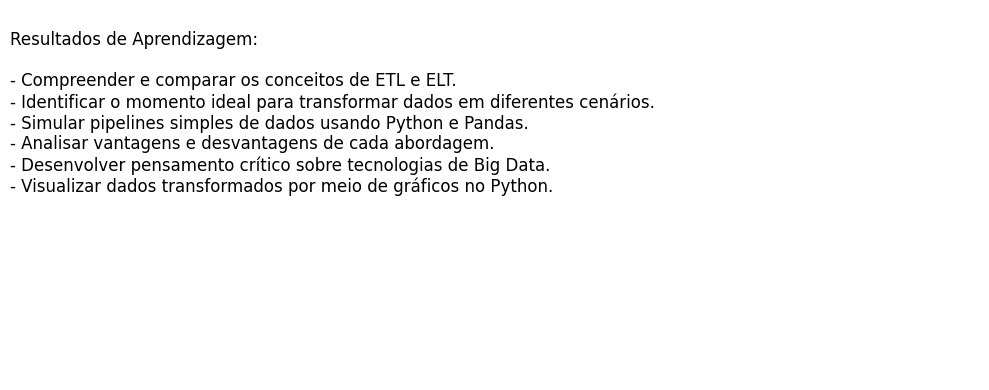

In [16]:
# -*- coding: utf-8 -*-
# Notebook: ETL_vs_ELT_Vitor_Leandro
# Relatório Pronto para PDF com gráfico e tabela ajustada

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import table
from IPython.display import display, Markdown

# -----------------------------
# 1. Título e Introdução
# -----------------------------
display(Markdown("# Experimento: ETL vs ELT"))
display(Markdown("**Aluno:** Vitor Leandro  \n**RA:** 2024121119  \n**Disciplina:** Ciência de Dados"))

display(Markdown("## Introdução"))
display(Markdown(
"Este experimento tem como objetivo compreender e comparar os conceitos de **ETL** "
"(Extract, Transform, Load) e **ELT** (Extract, Load, Transform). Serão simuladas pipelines "
"simples de dados usando Python e Pandas, calculando o valor total de pedidos por cliente e "
"comparando os resultados das duas abordagens."
))

# -----------------------------
# 2. Criar DataFrames iniciais
# -----------------------------
dados_pedidos = pd.DataFrame({
    'id_cliente': [1, 2, 3, 1],
    'produto': ['Notebook', 'Mouse', 'Monitor', 'Mouse'],
    'quantidade': [1, 2, 1, 3],
    'preco_unitario': [3000.00, 100.00, 900.00, 100.00]
})

dados_crm = pd.DataFrame({
    'id_cliente': [1, 2, 3],
    'nome': ['Ana', 'Bruno', 'Carla'],
    'email': ['ana@email.com', 'bruno@email.com', 'carla@email.com']
})

# -----------------------------
# 3. Processo ETL
# -----------------------------
dados_pedidos['valor_total'] = dados_pedidos['quantidade'] * dados_pedidos['preco_unitario']
dados_etl = pd.merge(dados_pedidos, dados_crm, on='id_cliente')
dados_etl = dados_etl.groupby(['id_cliente', 'nome', 'email']).agg({'valor_total': 'sum'}).reset_index()

# -----------------------------
# 4. Processo ELT
# -----------------------------
dados_carregados_pedidos = dados_pedidos.copy()
dados_carregados_crm = dados_crm.copy()

dados_carregados_pedidos['valor_total'] = dados_carregados_pedidos['quantidade'] * dados_carregados_pedidos['preco_unitario']
dados_elt = pd.merge(dados_carregados_pedidos, dados_carregados_crm, on='id_cliente')
dados_elt = dados_elt.groupby(['id_cliente', 'nome', 'email']).agg({'valor_total': 'sum'}).reset_index()

# -----------------------------
# 5. Gráfico comparativo
# -----------------------------
etl = dados_etl.sort_values(by='nome')
elt = dados_elt.sort_values(by='nome')

clientes = etl['nome']
valores_etl = etl['valor_total']
valores_elt = elt['valor_total']

x = np.arange(len(clientes))
largura = 0.35

plt.figure(figsize=(10,6))
plt.bar(x - largura/2, valores_etl, largura, label='ETL', color='skyblue')
plt.bar(x + largura/2, valores_elt, largura, label='ELT', color='orange')
plt.xlabel('Cliente')
plt.ylabel('Valor Total de Compra (R$)')
plt.title('Comparação ETL vs ELT por Cliente', fontsize=14)
plt.xticks(x, clientes)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# -----------------------------
# 6. Tabela de Resultados como imagem ajustada
# -----------------------------
tabela_resultados = pd.DataFrame({
    'Cliente': clientes,
    'Valor Total (ETL)': valores_etl,
    'Valor Total (ELT)': valores_elt
})

display(Markdown("## Tabela de Resultados"))

# Criar figura para a tabela refinada
fig, ax = plt.subplots(figsize=(6,2))
ax.axis('tight')
ax.axis('off')

tbl = ax.table(cellText=tabela_resultados.values,
               colLabels=tabela_resultados.columns,
               cellLoc='center',
               loc='center')

tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
tbl.scale(1.5, 1.5)
plt.show()

# -----------------------------
# 7. Análise e Conclusões como figura
# -----------------------------
texto_conclusao = """
Análise e Conclusões:

1. Diferença entre ETL e ELT: Não houve diferença, pois o cálculo de valor_total é idêntico.
2. Qual abordagem garante qualidade: ETL, pois permite transformar e validar os dados antes do carregamento.
3. Abordagem mais adequada em Big Data: ELT, pois permite carregar dados brutos e transformá-los posteriormente em ambientes distribuídos.
4. Percepção pessoal: O experimento possibilitou compreender a diferença entre ETL e ELT, como utilizar Python e Pandas para simular pipelines de dados e visualizar informações através de gráficos e tabelas.
"""

fig, ax = plt.subplots(figsize=(10,4))
ax.axis('off')
plt.text(0, 1, texto_conclusao, fontsize=12, va='top', wrap=True)
plt.tight_layout()
plt.show()

# -----------------------------
# 8. Resultados de Aprendizagem como figura
# -----------------------------
texto_aprendizagem = """
Resultados de Aprendizagem:

- Compreender e comparar os conceitos de ETL e ELT.
- Identificar o momento ideal para transformar dados em diferentes cenários.
- Simular pipelines simples de dados usando Python e Pandas.
- Analisar vantagens e desvantagens de cada abordagem.
- Desenvolver pensamento crítico sobre tecnologias de Big Data.
- Visualizar dados transformados por meio de gráficos no Python.
"""

fig, ax = plt.subplots(figsize=(10,4))
ax.axis('off')
plt.text(0, 1, texto_aprendizagem, fontsize=12, va='top', wrap=True)
plt.tight_layout()
plt.show()

